## Flight price prediction

In [163]:
import numpy as np
import pandas as pd
import lux
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
sns.set()
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [164]:
train_data = pd.read_excel('/home/thunder/Desktop/projects/flight fare price prediction/data/Data_Train.xlsx')

In [165]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [166]:
train_data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [167]:
train_data.isna().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [168]:
df = train_data.copy()

In [169]:
df.dropna(inplace=True)

In [170]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


### Object data type columns

In [171]:
df.select_dtypes(include='object').head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


### Int datatype column

In [172]:
df.select_dtypes(include='number').head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


### Exploratory data analysis

In [173]:
df['Date_of_Journey'].head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Here the data is not in good format if we give this data to our model then our model cant understand this type of data so, we have to extract the date, month and year

In [174]:
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [175]:
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [176]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,5


since we converted data of journey into integer so we can drop date of journey coloum

In [177]:
df['Dep_Time'].head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Extracting Hours and minutes for departure hour

In [178]:
df['departure_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['departure_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

### Extracting hours and minutes for **arrival hour**

In [179]:
df['arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [180]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,departure_hour,departure_min,arrival_hour,arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [181]:
df['Duration'].head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [182]:
df['new'] = df['Duration'].str.replace('h ',':')
df['new'] = df['new'].str.replace('h',':')
df['new'] = df['new'].str.replace('m','')

In [183]:
def extract(x):
    if x[-1] == ':':
        x = f'{x}00'
    if len(x.split(':')[0]) == 1:
        x = f'0{x}'
    if len(x.split(':')[-1])==1:
        a,b = x.split(':')[0],x.split(':')[-1]
        x = f'{a}:0{b}'
    return x

In [184]:
df['new'] = df['new'].apply(extract)

In [185]:
df['new'].head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [186]:
df['duration_hour'] = df['new'].apply(lambda x : int(x.split(':')[0]))
df['duration_min'] = df['new'].apply(lambda x : int(x.split(':')[-1]))

In [187]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,departure_hour,departure_min,arrival_hour,arrival_min,new,duration_hour,duration_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,02:50,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,07:25,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25,19:00,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,05:25,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,04:45,4,45


In [188]:
df.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration','new'],axis=1,inplace=True)

In [189]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,departure_hour,departure_min,arrival_hour,arrival_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Handling categorical data

In [190]:
df['Airline'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:>

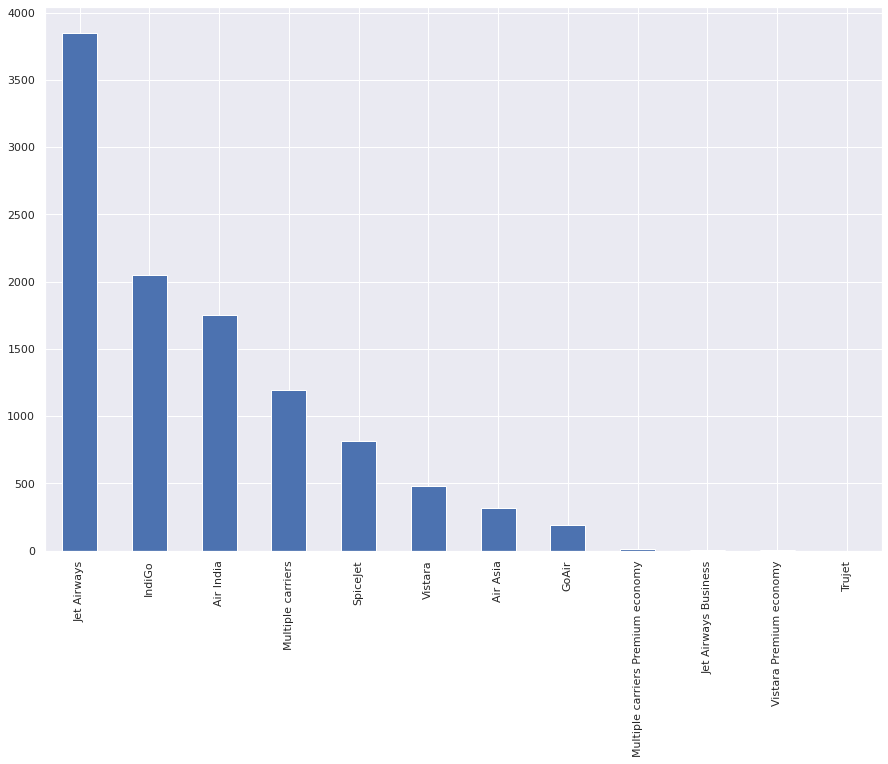

In [191]:
df['Airline'].value_counts().plot(kind='bar',figsize=(15,10))

<AxesSubplot:ylabel='None'>

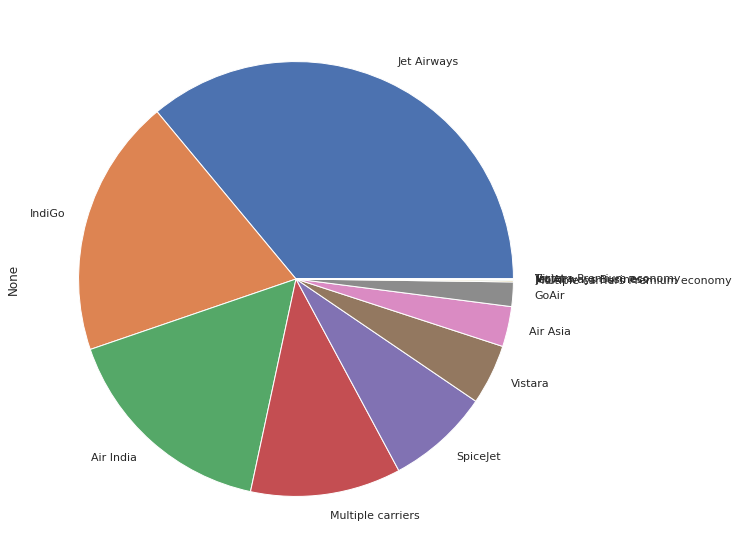

In [192]:
df['Airline'].value_counts().plot(kind='pie',figsize=(10,10))

In [193]:
airlines = pd.get_dummies(df['Airline'],drop_first=True)

In [194]:
airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [195]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
dtype: int64


<AxesSubplot:>

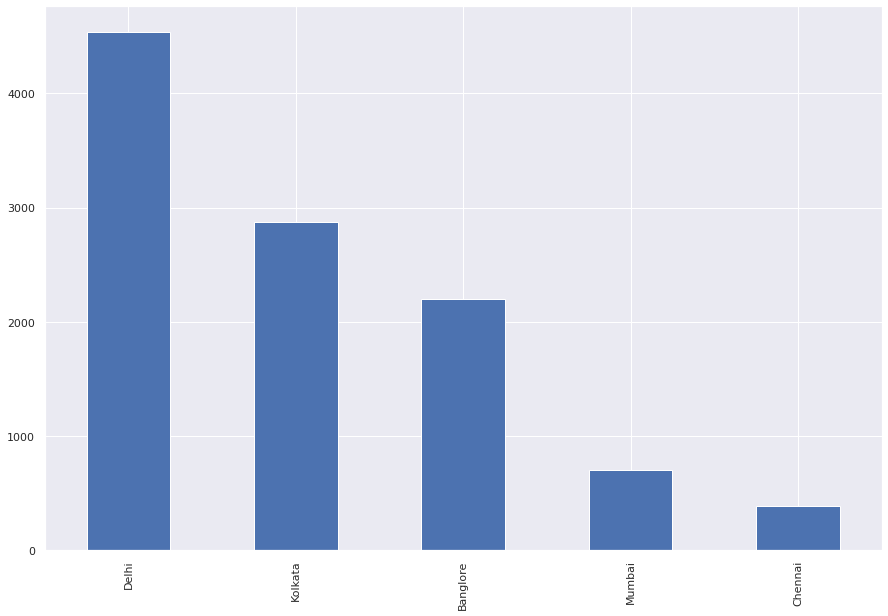

In [196]:
df['Source'].value_counts().plot(kind='bar',figsize=(15,10))

In [197]:
source = pd.get_dummies(df['Source'],drop_first=True)

In [199]:
source.head()

In [151]:
df['Destination'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:>

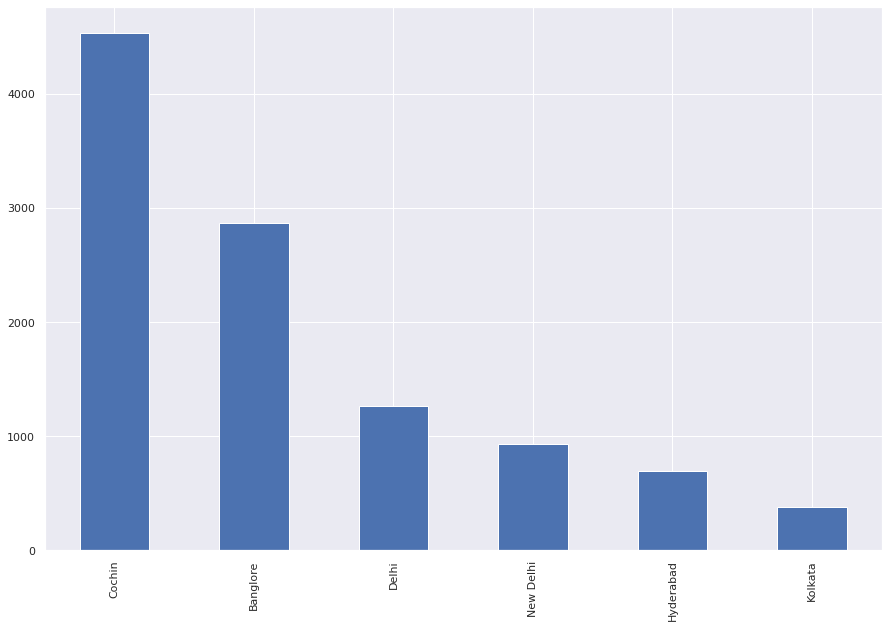

In [152]:
df['Destination'].value_counts().plot(kind='bar',figsize=(15,10))

In [153]:
destination = pd.get_dummies(df['Destination'],drop_first=True)
destination.add_prefix('d_')
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [154]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

#### Here the above route shows that those are the intermediate stops, it represents the number of stops 

In [155]:
df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,departure_hour,departure_min,arrival_hour,arrival_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [156]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [157]:
df.drop(['Airline','Route','Source','Destination','Additional_Info'],axis=1,inplace=True)

In [158]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,departure_hour,departure_min,arrival_hour,arrival_min,duration_hour,duration_min
0,non-stop,3897,24,3,22,20,1,10,2,50
1,2 stops,7662,1,5,5,50,13,15,7,25
2,2 stops,13882,9,6,9,25,4,25,19,0
3,1 stop,6218,12,5,18,5,23,30,5,25
4,1 stop,13302,1,3,16,50,21,35,4,45


In [159]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [160]:
stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
df['Total_Stops'] = df['Total_Stops'].map(stops)
df.head()

,Total_Stops,Price,Journey_day,Journey_month,departure_hour,departure_min,arrival_hour,arrival_min,duration_hour,duration_min
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45


In [161]:
df_final = pd.concat([df,airlines,source,destination],axis=1)
df_final.head()

,Total_Stops,Price,Journey_day,Journey_month,departure_hour,departure_min,arrival_hour,arrival_min,duration_hour,duration_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [48]:
df_final.shape

(10682, 30)

In [50]:
df_final.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'departure_hour', 'departure_min', 'arrival_hour', 'arrival_min',
       'duration_hour', 'duration_min', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

### We have to do the same process for test data also

In [48]:
test_data = pd.read_excel('/home/thunder/Desktop/projects/flight fare price prediction/data/Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [49]:
test_data.isna().sum()

df1 = test_data.copy()

df1.dropna(inplace=True)

# df1.info()

### Object data type columns

df1.select_dtypes(include='object').head()

### Int datatype column

df1.select_dtypes(include='number').head()

### Exploratory data analysis

df1['Date_of_Journey'].head()

# Here the data is not in good format if we give this data to our model then our model cant understand this type of data so, we have to extract the date, month and year

df1['Journey_day'] = pd.to_datetime(df1['Date_of_Journey'],format='%d/%m/%Y').dt.day

df1['Journey_month'] = pd.to_datetime(df1['Date_of_Journey'],format='%d/%m/%Y').dt.month

df1.head(10)

# since we converted data of journey into integer so we can drop date of journey coloum

df1['Dep_Time'].head()

### Extracting Hours and minutes for departure hour

df1['departure_hour'] = pd.to_datetime(df1['Dep_Time']).dt.hour
df1['departure_min'] = pd.to_datetime(df1['Dep_Time']).dt.minute

### Extracting hours and minutes for **arrival hour**

df1['arrival_hour'] = pd.to_datetime(df1['Arrival_Time']).dt.hour
df1['arrival_min'] = pd.to_datetime(df1['Arrival_Time']).dt.minute

df1.head()

df1['Duration'].head()

df1['new'] = df1['Duration'].str.replace('h ',':')
df1['new'] = df1['new'].str.replace('h',':')
df1['new'] = df1['new'].str.replace('m','')

def extract(x):
    if x[-1] == ':':
        x = f'{x}00'
    if len(x.split(':')[0]) == 1:
        x = f'0{x}'
    if len(x.split(':')[-1])==1:
        a,b = x.split(':')[0],x.split(':')[-1]
        x = f'{a}:0{b}'
    return x

df1['new'] = df1['new'].apply(extract)

df1['new'].head()

df1['duration_hour'] = df1['new'].apply(lambda x : x.split(':')[0])
df1['duration_min'] = df1['new'].apply(lambda x : x.split(':')[-1])

df1.head()



df1.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration','new'],axis=1,inplace=True)

df1.head()

### Handling categorical data

df1['Airline'].value_counts()

# df1['Airline'].value_counts().plot(kind='bar',figsize=(15,10))

# df1['Airline'].value_counts().plot(kind='pie',figsize=(10,10))

airlines = pd.get_dummies(df1['Airline'],drop_first=True)

airlines.head()

df1['Source'].value_counts()

# df1['Source'].value_counts().plot(kind='bar',figsize=(15,10))

source = pd.get_dummies(df1['Source'],drop_first=True)
source.head()

df1['Destination'].value_counts()

# df1['Destination'].value_counts().plot(kind='bar',figsize=(15,10))

destination = pd.get_dummies(df1['Destination'],drop_first=True)
destination.head()

df1['Route'].unique()

#### Here the above route shows that those are the intermediate stops, it represents the number of stops 

df1.head(1)

df1['Additional_Info'].unique()

df1.drop(['Airline','Route','Source','Destination','Additional_Info'],axis=1,inplace=True)

df1.head()

df1['Total_Stops'].unique()

stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
df1['Total_Stops'] = df1['Total_Stops'].map(stops)
df1.head()

df1_final = pd.concat([df1,airlines,source,destination],axis=1)
df1_final.head()

df1_final.shape
df1_final.head()

,Total_Stops,Journey_day,Journey_month,departure_hour,departure_min,arrival_hour,arrival_min,duration_hour,duration_min,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,04,00,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,00,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,02,50,0,...,0,0,0,0,0,0,1,0,0,0


In [50]:
x = df_final.drop(['Price'],axis=1)
y = df_final['Price']
print(x.shape,y.shape)

(10682, 29) (10682,)


In [51]:
df_final.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   Journey_day                        10682 non-null  int64
 3   Journey_month                      10682 non-null  int64
 4   departure_hour                     10682 non-null  int64
 5   departure_min                      10682 non-null  int64
 6   arrival_hour                       10682 non-null  int64
 7   arrival_min                        10682 non-null  int64
 8   duration_hour                      10682 non-null  int64
 9   duration_min                       10682 non-null  int64
 10  Air India                          10682 non-null  uint8
 11  GoAir                              10682 non-null  uint8
 12  IndiGo            

<AxesSubplot:>

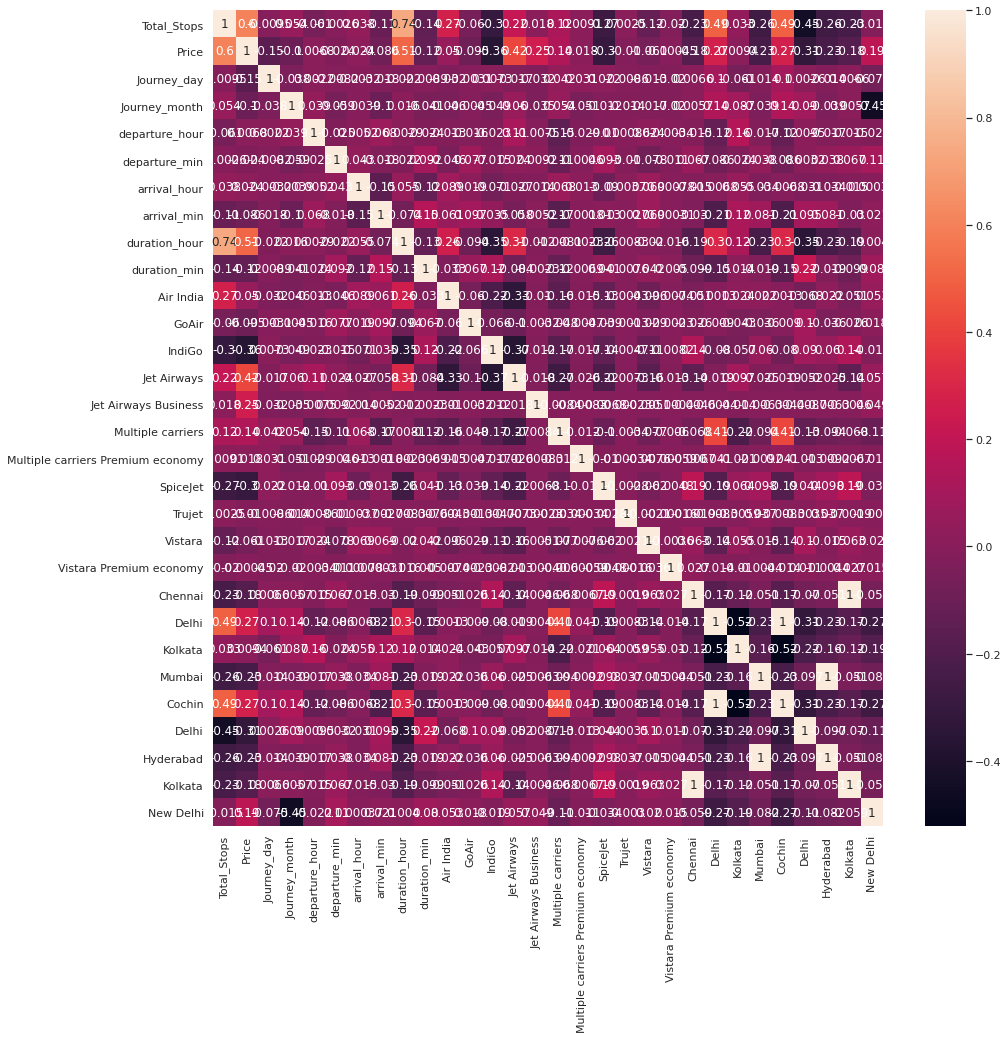

In [54]:
plt.figure(figsize=(15,15))
sns.heatmap(df_final.corr(),annot=True)

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8545, 29), (2137, 29), (8545,), (2137,))

In [82]:
model1 = RandomForestRegressor()
model1.fit(x_train,y_train)

RandomForestRegressor()

In [83]:
y_pred = model1.predict(x_test)

In [84]:
y_pred

array([ 5408.46      , 11785.50416667, 12901.8725    , ...,
       13629.68933333,  7641.47      ,  4333.07      ])

In [85]:
model1.score(x_train,y_train)

0.9546771297488139

In [86]:
model1.score(x_test,y_test)

0.8039276368070164

<AxesSubplot:ylabel='Density'>

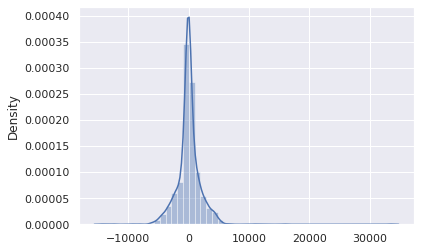

In [87]:
sns.distplot(y_test-y_pred)

Text(0, 0.5, 'y_pred')

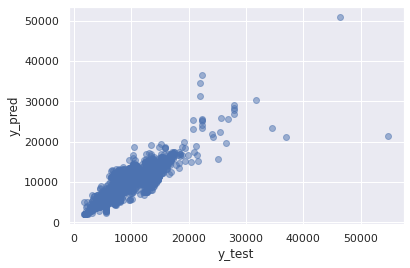

In [88]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [89]:
mean_absolute_error(y_test,y_pred)

1216.2824604045672

In [90]:
mean_squared_error(y_test,y_pred)

4021579.539246705

In [91]:
r2_score(y_test,y_pred)

0.8039276368070164

## Hyperparameter Tuning

In [92]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [93]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [94]:
rf_random = RandomizedSearchCV(estimator = model1, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [95]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [96]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [97]:
prediction = rf_random.predict(x_test)

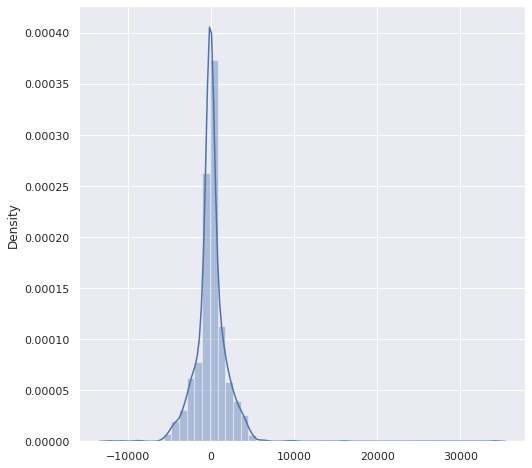

In [98]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

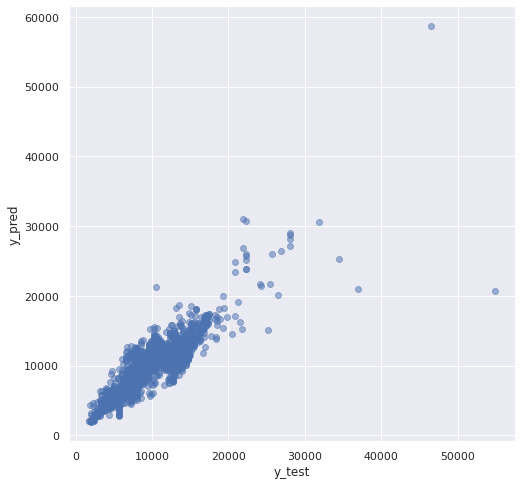

In [99]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [105]:
print(mean_absolute_error(y_test,prediction))

print(mean_squared_error(y_test,prediction))

print(r2_score(y_test,prediction))

1171.3337382943193
3683219.042673808
0.8204244240834472


In [102]:
import pickle
file = open('model_flight.pkl', 'wb')

pickle.dump(rf_random, file)

In [103]:
model = open('model_flight.pkl','rb')
forest = pickle.load(model)

In [106]:
y_prediction = forest.predict(x_test)

In [108]:
r2_score(y_test, y_prediction)

0.8204244240834472